In [42]:
import numpy as np
import pandas as pd

# Import the datasets
apple_term_training = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/TrainingData_New/Apple-Term_reduced.csv')
apple_2gram_training = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/TrainingData_New/Apple-Bigram_reduced.csv')
apple_3gram_training = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/TrainingData_New/Apple-Trigram_reduced.csv')
apple_4gram_training = pd.read_csv('https://raw.githubusercontent.com/Matin-M/StockDirectionPrediction/main/Data/TrainingData_New/Apple-4-gram_reduced.csv')

In [43]:
# Term training data and labels
X_train_term = apple_term_training.iloc[:, :-1].values
y_train_term = apple_term_training.iloc[:, -1].values

# Bigram training data and labels
X_train_2gram = apple_2gram_training.iloc[:, :-1].values
y_train_2gram = apple_2gram_training.iloc[:, -1].values

# 3gram training data and labels
X_train_3gram = apple_3gram_training.iloc[:, :-1].values
y_train_3gram = apple_3gram_training.iloc[:, -1].values

# 4gram training data and labels
X_train_4gram = apple_4gram_training.iloc[:, :-1].values
y_train_4gram = apple_4gram_training.iloc[:, -1].values

Term - Average accuracy: 0.562 (+- 0.021)
Bigram - Average accuracy: 0.557 (+- 0.023)
Trigram - Average accuracy: 0.538 (+- 0.016)
4-gram - Average accuracy: 0.537 (+- 0.017)


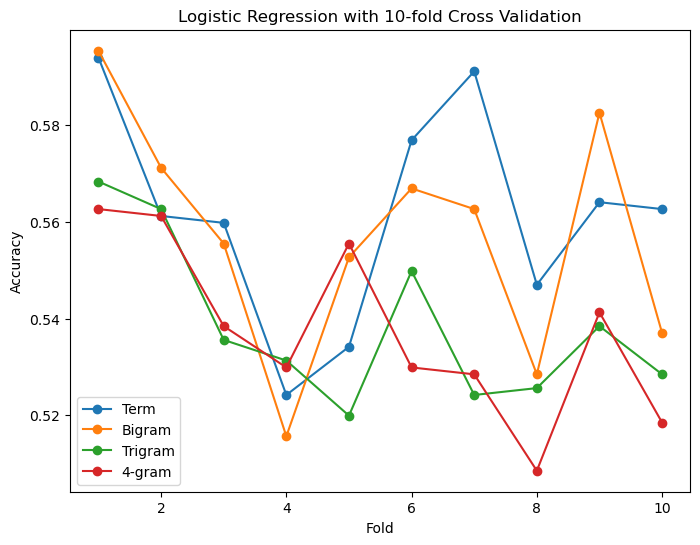


Classification Report (Term):
              precision    recall  f1-score      support
0              0.547342  0.657260  0.597286  3650.000000
1              0.525597  0.411276  0.461462  3370.000000
accuracy       0.539174  0.539174  0.539174     0.539174
macro avg      0.536470  0.534268  0.529374  7020.000000
weighted avg   0.536903  0.539174  0.532083  7020.000000

Classification Report (Bigram):
              precision    recall  f1-score      support
0              0.532349  0.671781  0.593992  3650.000000
1              0.503728  0.360831  0.420470  3370.000000
accuracy       0.522507  0.522507  0.522507     0.522507
macro avg      0.518039  0.516306  0.507231  7020.000000
weighted avg   0.518609  0.522507  0.510692  7020.000000

Classification Report (Trigram):
              precision    recall  f1-score      support
0              0.517815  0.776438  0.621287  3650.000000
1              0.472527  0.216914  0.297336  3370.000000
accuracy       0.507835  0.507835  0.507835    

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report

# Adjust pandas display options
pd.options.display.max_columns = None
pd.options.display.width = None

def evaluate_model(n_gram, X_train, y_train, ax):
    model = LogisticRegression(solver='saga', max_iter=5000)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv)
    print(f'{n_gram} - Average accuracy: %.3f (+- %.3f)' % (np.mean(scores), np.std(scores)))
    
    ax.plot(range(1, k+1), scores, '-o', label=n_gram)
    
    y_pred = cross_val_predict(model, X_train, y_train, cv=k)
    report = classification_report(y_train, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    
    return report_df

k = 10
cv = KFold(n_splits=k, random_state=42, shuffle=True)
fig, ax = plt.subplots(figsize=(8, 6))

n_grams = ['Term', 'Bigram', 'Trigram', '4-gram']
X_train_list = [X_train_term, X_train_2gram, X_train_3gram, X_train_4gram]
y_train_list = [y_train_term, y_train_2gram, y_train_3gram, y_train_4gram]

reports = []
for n_gram, X_train, y_train in zip(n_grams, X_train_list, y_train_list):
    report_df = evaluate_model(n_gram, X_train, y_train, ax)
    reports.append(report_df)

ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title(f'Logistic Regression with {k}-fold Cross Validation')
ax.legend()
plt.show()

# Print classification reports
for n_gram, report_df in zip(n_grams, reports):
    print(f'\nClassification Report ({n_gram}):')
    print(report_df)
